# import torch

In [1]:
import torch
torch.__version__

'1.10.1+cu113'

# GPU check

In [2]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# Download MNIST dataset

## What is MNIST dataset?
> MNIST 데이터베이스 (Modified National Institute of Standards and Technology database)는  
손으로 쓴 숫자들로 이루어진 대형 데이터베이스이며,   
다양한 화상 처리 시스템을 트레이닝하기 위해 일반적으로 사용된다.   
이 데이터베이스는 또한 기계 학습 분야의 트레이닝 및 테스트에 널리 사용된다.  
>  
> https://ko.wikipedia.org/wiki/MNIST_데이터베이스


> `Dataset` 은 샘플과 정답(label)을 저장하기 위한 목적으로 사용됩니다.  
https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html

In [22]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt

# local에 데이터가 없으면 다운로드 받음
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)


In [42]:
print(train_data)
print("----")
print(train_data[0])

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
----
(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.

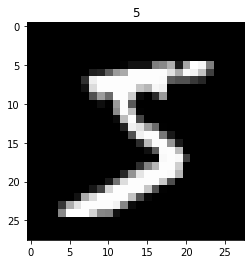

In [44]:
# pixel matrix를 받아서 그림으로 그려주는 함수
import matplotlib.pyplot as plt
def draw(image, label):
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.title(f"{label}")
    plt.show()

img, label = train_data[0]
draw(img, label)

# Plot multiple train_data

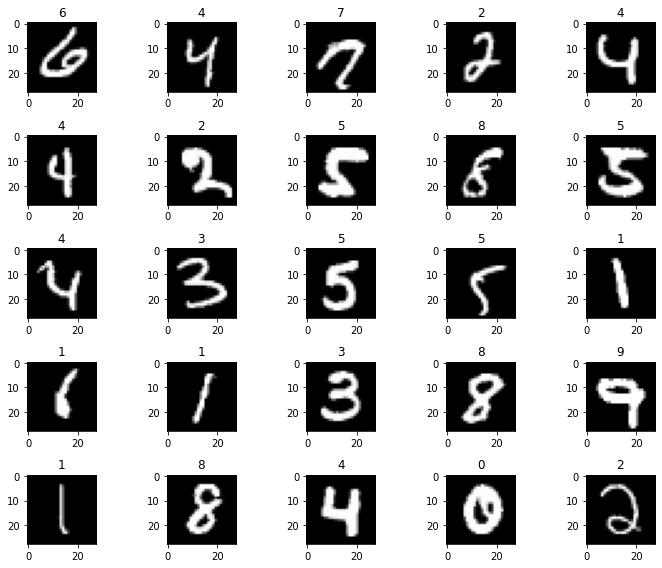

In [45]:
# 입력 데이터를 5*5로 그려줌
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = np.random.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    #plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

plt.tight_layout()
plt.show()

# Dataloader

> DataLoader 는 Dataset 을 샘플에 쉽게 접근할 수 있도록 순회 가능한 객체(iterable)로 감쌉니다.  
Dataset 은 데이터셋의 특징(feature)을 가져오고  
하나의 샘플에 정답(label)을 지정하는 일을 한 번에 합니다.  
모델을 학습할 때, 일반적으로 샘플들을 “미니배치(minibatch)”로 전달하고,  
매 에폭(epoch)마다 데이터를 다시 섞어서 과적합(overfit)을 막고,  
Python의 multiprocessing 을 사용하여 데이터 검색 속도를 높이려고 합니다.
>
> DataLoader 는 간단한 API로 이러한 복잡한 과정들을 추상화한 순회 가능한 객체(iterable)입니다  
https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html

In [7]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, ),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x2449a0ec4c0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x2449a0ecd30>}

# Defile Model

In [8]:
import torch.nn as nn
import torch.nn.functional as F
class NN(nn.Module):
    
    def __init__(self, in_features, out_features):
        super(NN, self).__init__()
        
        self.nn = nn.Sequential(
            nn.Linear(in_features, 128),    # layer1 - input
            nn.ReLU(),              
            #nn.BatchNorm1d(128), 
            
            nn.Linear(128, 256),            # layer2 - hidden
            nn.ReLU(),
            #nn.BatchNorm1d(256),
            
            nn.Linear(256, 256),            # layer3 - hidden
            nn.ReLU(),
            #nn.BatchNorm1d(256),
            
            nn.Linear(256, 128),            # layer4 - hidden
            nn.ReLU(),
            #nn.BatchNorm1d(128),
            
            nn.Linear(128, out_features),    # layer5 - out
        )
        
    def forward(self, x):
        x = x.view(-1)
        out = self.nn(x)
        
        return out

In [9]:
model = NN(28*28, 10)
model.to(device)
print(model)

NN(
  (nn): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [10]:
import matplotlib.pyplot as plt
def draw(image, label):
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.title(f"{label}")
    plt.show()

In [11]:
import random
def show_predict(model):
    idx = random.randrange(0, len(test_data)-1)
    image, gt = test_data[idx]
    print("image", image.shape)
    image = image.to(device)
    predicted = model(image.view(1,-1))
    print(predicted)
    print(predicted.shape)
    label = torch.argmax(predicted).item()
    confidence = predicted[label].item()
    #confidence, label = torch.max(predicted, 1)
    label = torch.argmax(predicted).cpu().item()
    print("idx:", idx)
    print(predicted)
    print("label:", label, "confidence:", confidence)
    draw(image.cpu(), label)

image torch.Size([1, 28, 28])
tensor([-0.0533, -0.0594, -0.0445,  0.0174,  0.0180, -0.0262,  0.0257,  0.0412,
         0.0149,  0.0626], device='cuda:0', grad_fn=<AddBackward0>)
torch.Size([10])
idx: 1781
tensor([-0.0533, -0.0594, -0.0445,  0.0174,  0.0180, -0.0262,  0.0257,  0.0412,
         0.0149,  0.0626], device='cuda:0', grad_fn=<AddBackward0>)
label: 9 confidence: 0.06261371076107025


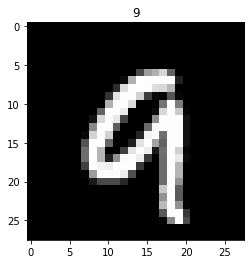

In [12]:
show_predict(model)

# Define loss function

In [13]:
loss_func = nn.CrossEntropyLoss()   
loss_func

CrossEntropyLoss()

# Define optimizer

In [14]:
from torch import optim
optimizer = optim.Adam(model.parameters(), lr = 0.0001)   
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0001
    weight_decay: 0
)

# Train model

In [15]:
from torch.autograd import Variable
num_epochs = 5

def train(num_epochs, model, loaders):
    
    model.train()
        
    # Train the model
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            
            images = images.to(device, dtype=torch.float32)
            labels = labels.to(device)
            
            # iteration
            loss = 0    # iteration loss
            for idx in range(len(images)):
                output = model(images[idx])      
                loss =+ loss_func(output.unsqueeze(0), labels[idx].unsqueeze(0))
            
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()    

            # apply gradients             
            optimizer.step()                
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.6f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
                pass
        
        pass
    
    
    pass
train(num_epochs, model, loaders)

Epoch [1/5], Step [100/600], Loss: 2.2872
Epoch [1/5], Step [200/600], Loss: 2.2676
Epoch [1/5], Step [300/600], Loss: 2.1583
Epoch [1/5], Step [400/600], Loss: 1.5233
Epoch [1/5], Step [500/600], Loss: 1.8820
Epoch [1/5], Step [600/600], Loss: 2.4590
Epoch [2/5], Step [100/600], Loss: 1.5850
Epoch [2/5], Step [200/600], Loss: 0.7674
Epoch [2/5], Step [300/600], Loss: 2.5405
Epoch [2/5], Step [400/600], Loss: 0.9325
Epoch [2/5], Step [500/600], Loss: 1.0299
Epoch [2/5], Step [600/600], Loss: 0.4610
Epoch [3/5], Step [100/600], Loss: 1.0679
Epoch [3/5], Step [200/600], Loss: 0.4226
Epoch [3/5], Step [300/600], Loss: 0.1158
Epoch [3/5], Step [400/600], Loss: 0.1414
Epoch [3/5], Step [500/600], Loss: 0.4857
Epoch [3/5], Step [600/600], Loss: 1.9118
Epoch [4/5], Step [100/600], Loss: 1.0540
Epoch [4/5], Step [200/600], Loss: 0.8684
Epoch [4/5], Step [300/600], Loss: 0.1176
Epoch [4/5], Step [400/600], Loss: 0.7664
Epoch [4/5], Step [500/600], Loss: 1.2029
Epoch [4/5], Step [600/600], Loss:

# Evaluate

In [47]:
from tqdm import tqdm
def evaluate():
    # Test the model
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        
        with torch.no_grad():
            for images, labels in tqdm(loaders['test']):
                images = images.to(device, dtype=torch.float32)
                labels = labels.to(device)
                for idx in range(len(images)):
                    output = model(images[idx])  
                    pred = torch.max(output.unsqueeze(0), 1)[1].item()
                    total += 1
                    if pred == labels[idx].item():
                        correct+=1
                
        print(f'Test Accuracy of the model on the 10000 test images: {correct/total*100:.2f}%')
    
    pass
evaluate()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 16.75it/s]

Test Accuracy of the model on the 10000 test images: 83.40%


# Evaluation data sampling

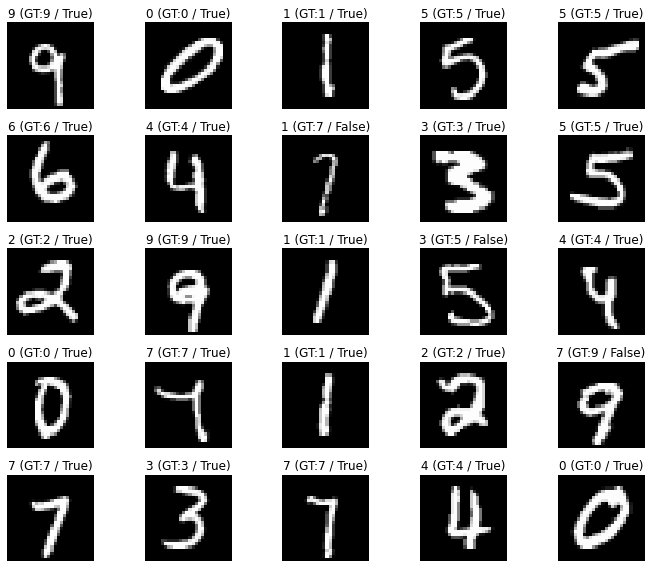

In [53]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    model.eval()
    sample_idx = np.random.randint(len(test_data), size=(1,)).item()
    img, gt = test_data[sample_idx]
    img = img.to(device)

    predicted = model(img.view(1,1,28,28))
    label = torch.argmax(predicted)

    figure.add_subplot(rows, cols, i)
    plt.title(f"{label} (GT:{gt} / {gt==label})")
    plt.axis("off")
    plt.imshow(img.view(28,28).cpu(), cmap="gray")

plt.tight_layout()
plt.show()

# Test

image torch.Size([1, 28, 28])
tensor([-11.2062,   5.7033,   0.9719,  -0.0627,  -5.1895,  -2.7923,  -5.0469,
         -2.7987,   0.8620,  -4.0565], device='cuda:0', grad_fn=<AddBackward0>)
torch.Size([10])
idx: 7123
tensor([-11.2062,   5.7033,   0.9719,  -0.0627,  -5.1895,  -2.7923,  -5.0469,
         -2.7987,   0.8620,  -4.0565], device='cuda:0', grad_fn=<AddBackward0>)
label: 1 confidence: 5.7032694816589355


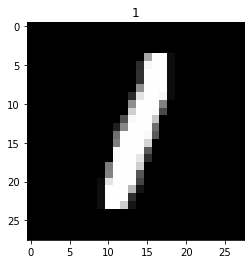

In [21]:
show_predict(model)